In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tools.plotting import scatter_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.cluster import KMeans

%matplotlib inline

In [2]:
ls

Inside_Airbnb_Data.ipynb  listings 2.csv            neighbourhoods.geojson
calendar.csv              listings.csv              reviews 2.csv
cluster_centers.csv       neighbourhoods.csv        reviews.csv


In [3]:
calendar_df = pd.read_csv('calendar.csv')


In [4]:
calendar_df.shape

(762850, 4)

In [5]:
listings_df = pd.read_csv('listings.csv')

In [6]:
listings_df.columns

Index([u'id', u'name', u'host_id', u'host_name', u'neighbourhood_group',
       u'neighbourhood', u'latitude', u'longitude', u'room_type', u'price',
       u'minimum_nights', u'number_of_reviews', u'last_review',
       u'reviews_per_month', u'calculated_host_listings_count',
       u'availability_365'],
      dtype='object')

In [7]:
listings2_df = pd.read_csv('listings 2.csv')

In [8]:
# these are cleaned data?
listings2_df.columns

Index([u'id', u'listing_url', u'scrape_id', u'last_scraped', u'name',
       u'summary', u'space', u'description', u'picture_url', u'host_id',
       u'host_url', u'host_name', u'host_since', u'host_location',
       u'host_about', u'host_response_time', u'host_response_rate',
       u'host_acceptance_rate', u'host_is_superhost', u'host_picture_url',
       u'street', u'neighbourhood', u'neighbourhood_cleansed',
       u'neighbourhood_group_cleansed', u'city', u'state', u'zipcode',
       u'market', u'country', u'latitude', u'longitude', u'is_location_exact',
       u'property_type', u'room_type', u'accommodates', u'bathrooms',
       u'bedrooms', u'beds', u'bed_type', u'square_feet', u'price',
       u'weekly_price', u'monthly_price', u'guests_included', u'extra_people',
       u'minimum_nights', u'maximum_nights', u'calendar_updated',
       u'availability_30', u'availability_60', u'availability_90',
       u'availability_365', u'calendar_last_scraped', u'number_of_reviews',
       u

In [9]:
reviews_df = pd.read_csv('reviews.csv')

In [10]:
reviews2_df = pd.read_csv('reviews.csv')

In [11]:
reviews_df.shape

(50431, 2)

In [12]:
# The two csv files are the same
np.sum(reviews2_df != reviews_df)

listing_id    0
date          0
dtype: int64

In [14]:
listings2 = pd.read_csv('listings 2.csv')

In [15]:
listings2.shape

(2090, 68)

In [16]:
listings2.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,picture_url,host_id,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
0,2437064,https://www.airbnb.com/rooms/2437064,20150512190642,2015-05-12,"Cozy room, close-in NE Portland","Comfortable, furnished room in NE Portland. Th...",Affordable and in a great location to access a...,"Comfortable, furnished room in NE Portland. Th...",https://a1.muscache.com/ic/pictures/45310753/5...,12455847,...,10,10,10,10,10,t,NaN,"OREGON, MULTNOMAH, PORTLAND",1,2.9
1,240583,https://www.airbnb.com/rooms/240583,20150512190642,2015-05-12,*Honeydew Condo,NaN,Located near Mt. Tabor. Each unit is mid-centu...,Located near Mt. Tabor. Each unit is mid-centu...,https://a0.muscache.com/ic/pictures/64949272/2...,828435,...,10,10,10,10,10,t,NaN,"OREGON, MULTNOMAH, PORTLAND",17,0.2
2,1594171,https://www.airbnb.com/rooms/1594171,20150512190642,2015-05-12,The Canary Nest (NW 21st),Cute 'nest' apt in the heart of NW Portland. T...,This apartment has everything going for it. A ...,Cute 'nest' apt in the heart of NW Portland. T...,https://a1.muscache.com/ic/pictures/43329954/5...,8502900,...,9,9,9,10,9,t,NaN,"OREGON, MULTNOMAH, PORTLAND",1,2.5
3,741884,https://www.airbnb.com/rooms/741884,20150512190642,2015-05-12,Charmer in the Heart of Nob Hill,NaN,I live in an amazing ground floor 1 1/2 Bedroo...,I live in an amazing ground floor 1 1/2 Bedroo...,https://a0.muscache.com/ic/pictures/10193717/f...,3884282,...,10,10,10,10,10,t,NaN,"OREGON, MULTNOMAH, PORTLAND",1,0.1
4,3649423,https://www.airbnb.com/rooms/3649423,20150512190642,2015-05-12,Lost Arts Ranch,Bright and airy room in our Midcentury ranch i...,The guest room is on the main floor of our Mid...,Bright and airy room in our Midcentury ranch i...,https://a1.muscache.com/ic/pictures/47074601/1...,10850744,...,9,10,10,9,10,t,NaN,"OREGON, MULTNOMAH, PORTLAND",1,0.3


In [17]:
listings2_df['price'] = listings2_df['price'].map(lambda x: float(x.strip('$')))

In [18]:
listings2_df['monthly_price'] = listings2_df['monthly_price'].map(lambda x: float(x.translate(None,'$,')) if x >= 0 else x)

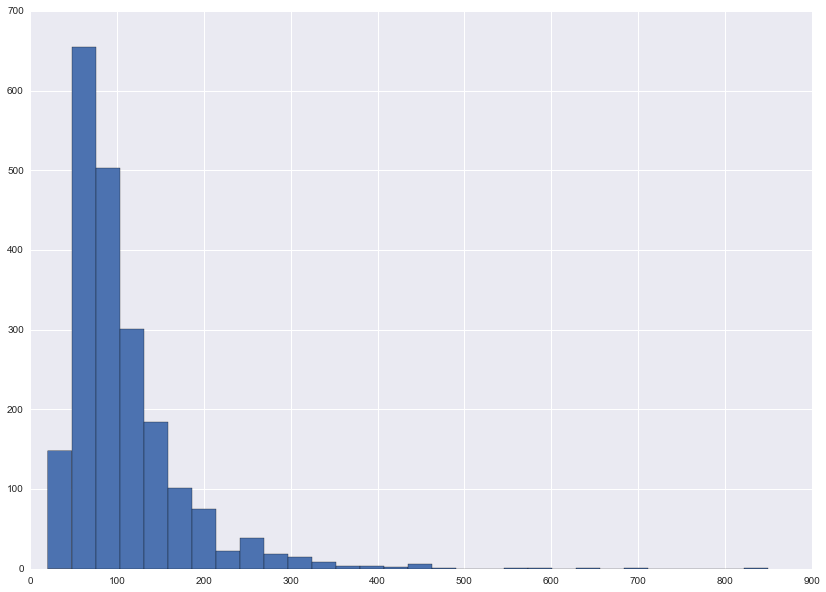

In [19]:
plt.figure(figsize=(14,10))
plt.hist(listings2_df['price'], bins=30)
plt.show()

In [20]:
listings2_df.columns

Index([u'id', u'listing_url', u'scrape_id', u'last_scraped', u'name',
       u'summary', u'space', u'description', u'picture_url', u'host_id',
       u'host_url', u'host_name', u'host_since', u'host_location',
       u'host_about', u'host_response_time', u'host_response_rate',
       u'host_acceptance_rate', u'host_is_superhost', u'host_picture_url',
       u'street', u'neighbourhood', u'neighbourhood_cleansed',
       u'neighbourhood_group_cleansed', u'city', u'state', u'zipcode',
       u'market', u'country', u'latitude', u'longitude', u'is_location_exact',
       u'property_type', u'room_type', u'accommodates', u'bathrooms',
       u'bedrooms', u'beds', u'bed_type', u'square_feet', u'price',
       u'weekly_price', u'monthly_price', u'guests_included', u'extra_people',
       u'minimum_nights', u'maximum_nights', u'calendar_updated',
       u'availability_30', u'availability_60', u'availability_90',
       u'availability_365', u'calendar_last_scraped', u'number_of_reviews',
       u

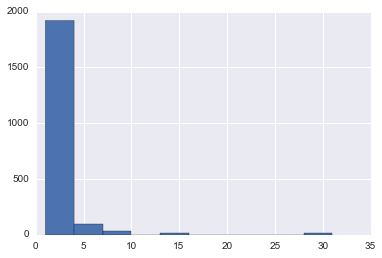

In [21]:
plt.hist(listings2_df['minimum_nights'],bins=10)
plt.show()

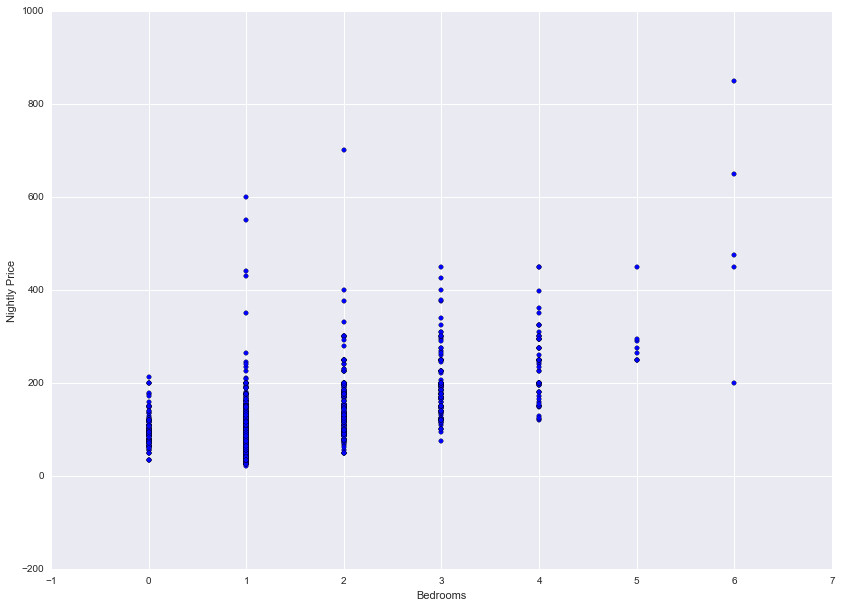

In [22]:
plt.figure(figsize=(14,10))
plt.scatter(listings2_df['bedrooms'], listings2_df['price'])
plt.xlabel('Bedrooms')
plt.ylabel('Nightly Price')
plt.show()

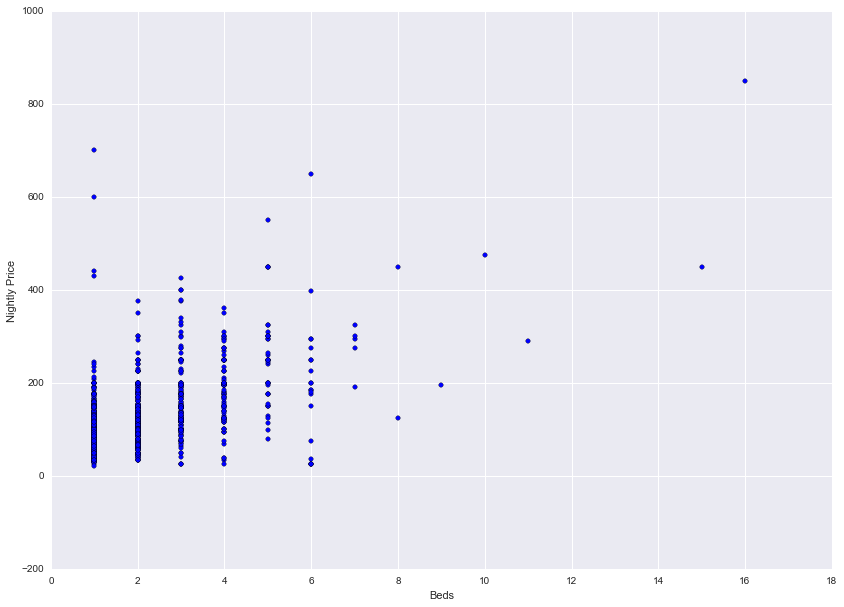

In [23]:
plt.figure(figsize=(14,10))
plt.scatter(listings2_df['beds'], listings2_df['price'])
plt.xlabel('Beds')
plt.ylabel('Nightly Price')
plt.show()

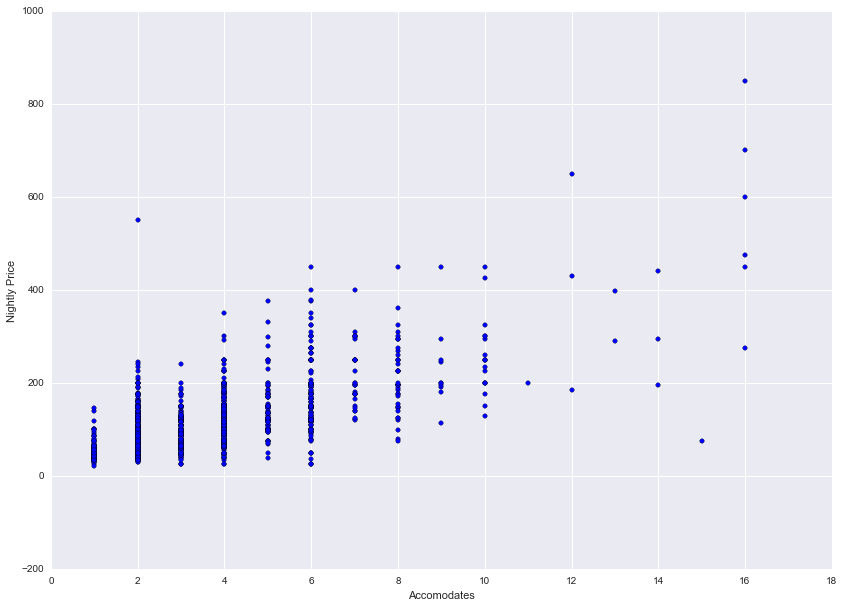

In [24]:
plt.figure(figsize=(14,10))
plt.scatter(listings2_df['accommodates'], listings2_df['price'])
plt.xlabel('Accomodates')
plt.ylabel('Nightly Price')
plt.show()

In [25]:
listings2_df['host_is_superhost'] = listings2_df['host_is_superhost'].map(lambda x: 1 if x == 't' else 0)

In [26]:
listings2_df['extra_people'] = listings2_df['extra_people'].map(lambda x: x.translate(None, '$,'))

In [27]:
numerical_only = listings2_df[['host_is_superhost', 'latitude', 'longitude', 'accommodates', 
                               'bathrooms', 'bedrooms', 'beds', 'price','guests_included', 
                               'extra_people', 'minimum_nights', 'maximum_nights','availability_30', 
                               'number_of_reviews']]

In [28]:
bed_type_dummies = pd.get_dummies(listings2_df['bed_type'])

In [29]:
bed_type_dummies.drop('Airbed', axis=1, inplace=True)

In [30]:
numerical_only = pd.merge(numerical_only, bed_type_dummies, right_index=True, left_index=True)

In [31]:
entire_apt_only = listings2_df[listings2_df['room_type'] == 'Entire home/apt']

In [32]:
numerical_only_entire_apt = numerical_only[numerical_only.index.isin(entire_apt_only.index)]

In [33]:
numerical_only_entire_apt.columns

Index([u'host_is_superhost', u'latitude', u'longitude', u'accommodates',
       u'bathrooms', u'bedrooms', u'beds', u'price', u'guests_included',
       u'extra_people', u'minimum_nights', u'maximum_nights',
       u'availability_30', u'number_of_reviews', u'Couch', u'Futon',
       u'Pull-out Sofa', u'Real Bed'],
      dtype='object')

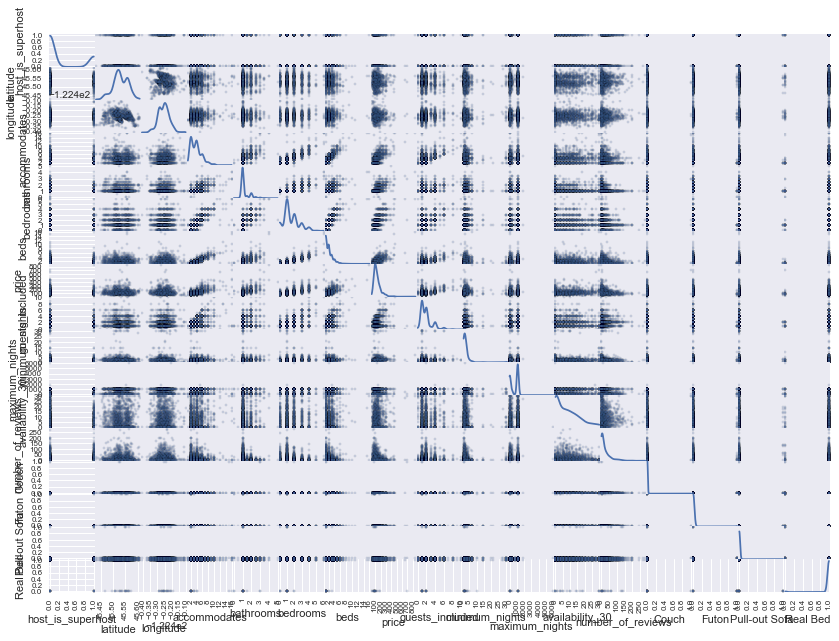

In [34]:
scatter_matrix(numerical_only_entire_apt, alpha=0.2, figsize=(14,10), diagonal='kde')
plt.show()

In [35]:
len(numerical_only_entire_apt.columns)

18

In [36]:
entire_apt_no_dummies = numerical_only_entire_apt.iloc[:,0:14]


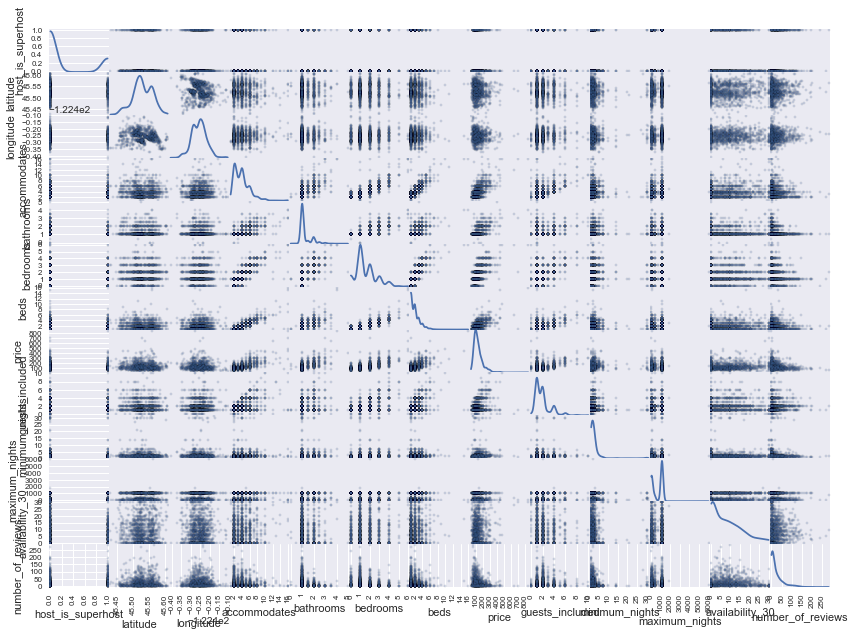

In [37]:
scatter_matrix(entire_apt_no_dummies, alpha=0.2, figsize=(14,10), diagonal='kde')
plt.show()

In [38]:
numerical_only_entire_apt = numerical_only_entire_apt.iloc[:, 0:18]

In [39]:
y = numerical_only_entire_apt['price']
X = numerical_only_entire_apt.drop('price', axis=1)

In [40]:
X['bedrooms'].fillna(3, inplace=True)

In [41]:
X['bathrooms'].fillna(1, inplace=True)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [43]:
rf = RandomForestRegressor(n_estimators=50)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [44]:
rf.score(X_test, y_test)

0.5136835843235521

In [45]:
mean_squared_error(y_test, rf.predict(X_test))

2126.7405943444728

In [46]:
mean_absolute_error(y_test, rf.predict(X_test))

30.62005141388175

In [47]:
rf.feature_importances_

array([  7.82483535e-03,   7.22179693e-02,   7.00367315e-02,
         2.83553339e-01,   1.68588244e-01,   1.19986076e-01,
         3.80531938e-02,   5.68985016e-02,   2.39888341e-02,
         2.68101018e-02,   3.57282149e-02,   5.05312078e-02,
         4.15706632e-02,   1.81066824e-03,   4.05960519e-04,
         2.12232869e-05,   1.97423544e-03])

In [48]:
X.columns

Index([u'host_is_superhost', u'latitude', u'longitude', u'accommodates',
       u'bathrooms', u'bedrooms', u'beds', u'guests_included', u'extra_people',
       u'minimum_nights', u'maximum_nights', u'availability_30',
       u'number_of_reviews', u'Couch', u'Futon', u'Pull-out Sofa',
       u'Real Bed'],
      dtype='object')

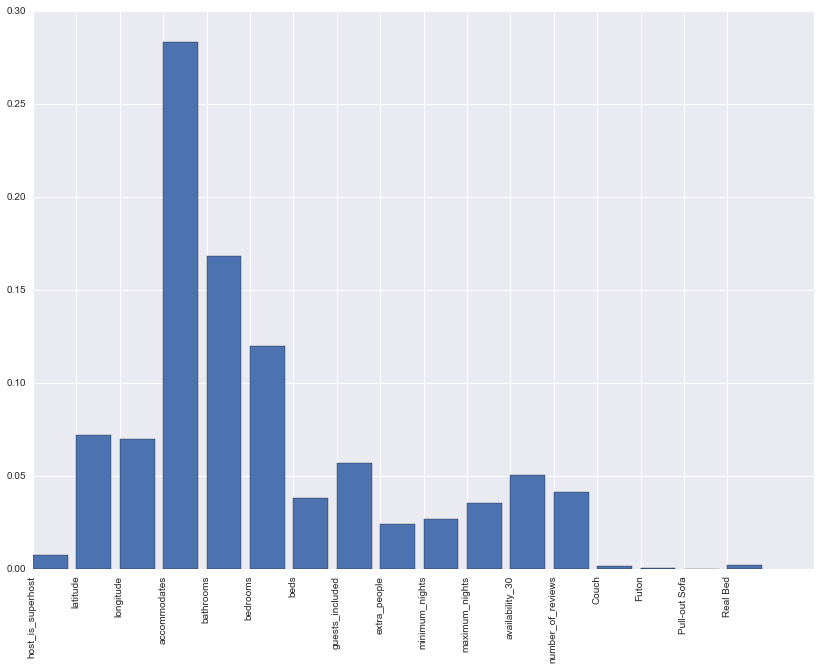

In [49]:
x = range(len(rf.feature_importances_))
plt.figure(figsize=(14,10))
plt.bar(x, rf.feature_importances_)
plt.xticks(x, X.columns, rotation=90)
plt.show()

## Cluster based on lat long and get median price per cluster

In [50]:
gps = X[['latitude', 'longitude']]

In [51]:
kmeans = KMeans(n_clsusters=30)

In [52]:
kmeans.fit(gps)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=30, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [53]:
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=['Latitude', 'Longitude'])

In [54]:
cluster_labels = kmeans.labels_

In [55]:
X['cluster'] = cluster_labels

In [56]:
X['cluster_median_price'] = X['cluster'].map(lambda x: np.median(y[X['cluster'] == x]))

In [57]:
cluster_centers['cluster_median_price'] = cluster_centers.index.map(lambda x: np.median(y[X['cluster'] == x]))

In [58]:
cluster_centers.reset_index(inplace=True)

In [59]:
cluster_centers['count'] = X.groupby('cluster').count()['latitude']

In [60]:
cluster_centers.to_csv('cluster_centers.csv')

In [61]:
rf3 = RandomForestRegressor(n_estimators=50, oob_score=True)

In [62]:
rf3.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=50, n_jobs=1, oob_score=True, random_state=None,
           verbose=0, warm_start=False)

In [63]:
rf3.oob_score_

0.50495254549322821

In [64]:
mean_squared_error(y, rf3.predict(X))

374.02056754460489

In [65]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.33)

In [66]:
rf4 = RandomForestRegressor(n_estimators=50, oob_score=True)

In [67]:
rf4.fit(X_train2, y_train2)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=50, n_jobs=1, oob_score=True, random_state=None,
           verbose=0, warm_start=False)

In [68]:
rf4.oob_score_

0.45816020017368952

In [69]:
mean_squared_error(y_test2, rf4.predict(X_test2))

2383.2323156812345

In [70]:
mean_absolute_error(y_test2, rf4.predict(X_test2))

31.965192802056553

##Feature engineer

In [75]:
# Create new variable "Accomodated per bedroom"
X.drop(['maximum_nights', 'extra_people', 'latitude', 'longitude', 'host_is_superhost', 'number_of_reviews', 'availability_30'], axis=1)

,accommodates,bathrooms,bedrooms,beds,guests_included,minimum_nights,Couch,Futon,Pull-out Sofa,Real Bed,cluster,cluster_median_price
1,4,1.0,1,1,2,3,0,0,0,1,19,115.0
2,3,1.0,0,1,2,2,0,0,0,1,13,120.0
3,1,1.0,1,1,1,1,0,0,0,1,13,120.0
5,4,1.0,1,1,2,6,0,0,0,1,28,148.0
8,2,1.0,1,1,2,2,0,0,0,1,15,110.0
10,7,1.0,2,4,1,2,0,0,0,1,15,110.0
12,7,2.0,3,5,6,2,0,0,0,1,15,110.0
13,8,1.5,3,5,1,2,0,0,0,1,0,115.0
16,2,1.0,1,1,1,3,0,0,0,1,10,103.0
17,4,2.0,2,2,4,2,0,0,0,1,10,103.0


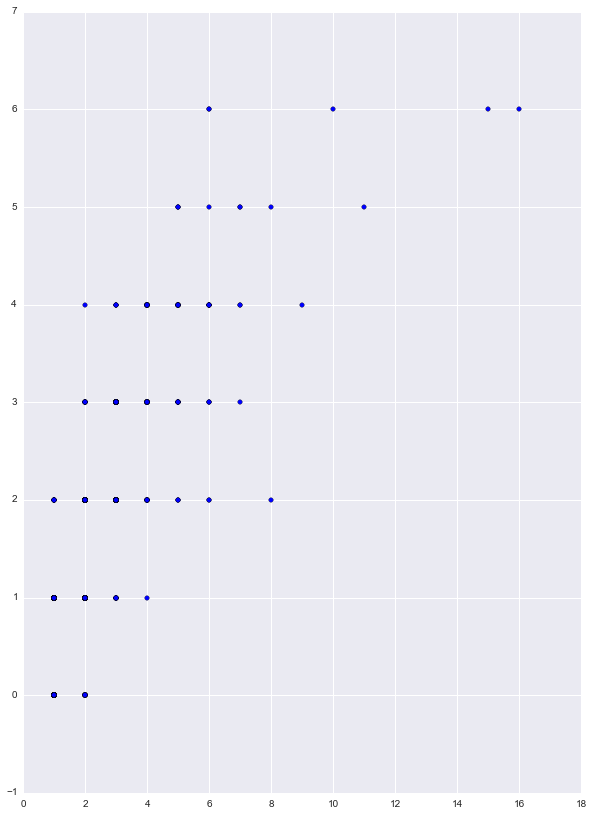

In [77]:
plt.figure(figsize=(10,14))
plt.scatter(X['beds'], X['bedrooms'])
plt.show()

In [81]:
X_small = X.drop(['maximum_nights', 'extra_people', 'latitude', 'longitude', 'host_is_superhost', 'number_of_reviews', 'availability_30'], axis=1)

In [83]:
X_small['acc_per_bed'] = X_small['accommodates'] / X_small['beds']

In [85]:
X_small = X_small.drop(['accommodates', 'beds'], axis=1)

In [86]:
X_small

,bathrooms,bedrooms,guests_included,minimum_nights,Couch,Futon,Pull-out Sofa,Real Bed,cluster,cluster_median_price,acc_per_bed
1,1.0,1,2,3,0,0,0,1,19,115.0,4.000000
2,1.0,0,2,2,0,0,0,1,13,120.0,3.000000
3,1.0,1,1,1,0,0,0,1,13,120.0,1.000000
5,1.0,1,2,6,0,0,0,1,28,148.0,4.000000
8,1.0,1,2,2,0,0,0,1,15,110.0,2.000000
10,1.0,2,1,2,0,0,0,1,15,110.0,1.750000
12,2.0,3,6,2,0,0,0,1,15,110.0,1.400000
13,1.5,3,1,2,0,0,0,1,0,115.0,1.600000
16,1.0,1,1,3,0,0,0,1,10,103.0,2.000000
17,2.0,2,4,2,0,0,0,1,10,103.0,2.000000


In [87]:
rf4 = RandomForestRegressor(n_estimators=50, oob_score=True)

In [92]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_small, y)

In [93]:
rf4.fit(X_train2, y_train2)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=50, n_jobs=1, oob_score=True, random_state=None,
           verbose=0, warm_start=False)

In [96]:
rf4.oob_prediction_.shape

(882,)

In [98]:
mean_squared_error(y_train2, rf4.oob_prediction_)

3023.2029555182971

In [99]:
mean_absolute_error(y_train2, rf4.oob_prediction_)

35.105959753371039

In [100]:
rf4.feature_importances_

array([  2.53060629e-01,   3.10096167e-01,   8.61045217e-02,
         6.80776951e-02,   1.42635431e-02,   1.08953725e-03,
         2.35500619e-04,   4.90269343e-03,   7.90157543e-02,
         7.59629403e-02,   1.07191018e-01])

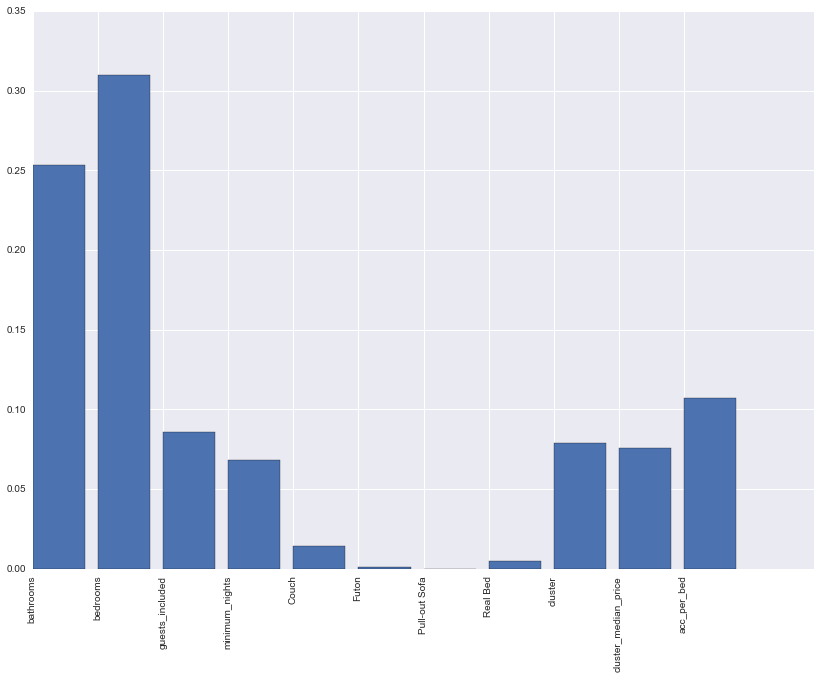

In [101]:
# are feature importances different from previous random forests?
x_plot = range(len(rf4.feature_importances_))
plt.figure(figsize=(14,10))
plt.bar(x_plot, rf4.feature_importances_)
plt.xticks(x_plot, X_small.columns, rotation=90)
plt.show()

## Try Boosting

In [102]:
from sklearn.ensemble import GradientBoostingRegressor

In [103]:
# default parameters
gbr = GradientBoostingRegressor()

In [104]:
gbr.fit(X_train2, y_train2)

GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.1, loss='ls',
             max_depth=3, max_features=None, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             random_state=None, subsample=1.0, verbose=0, warm_start=False)

In [106]:
print mean_squared_error(y_test2, gbr.predict(X_test2))
print mean_absolute_error(y_test2, gbr.predict(X_test2))

2477.82976342
30.3362038908


In [122]:
# export train, test data
#!mkdir train_test_data
X_train2.to_csv('train_test_data/X_train2.csv')
X_test2.to_csv('train_test_data/X_test2.csv')
pd.DataFrame(y_train2).to_csv('train_test_data/y_train2.csv')
pd.DataFrame(y_test2).to_csv('train_test_data/y_test2.csv')


NameError: name 'X' is not defined